In [ ]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import torch
import json

In [2]:
model_id = "google/paligemma-3b-pt-448"
peft_adapter_id = "riphunter7001x/PaliGemma3_FT_OCR"

In [3]:
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id,device_map="auto")
processor = AutoProcessor.from_pretrained(model_id)
model.load_adapter(peft_adapter_id).eval()
TORCH_DTYPE = model.dtype
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

### testing 

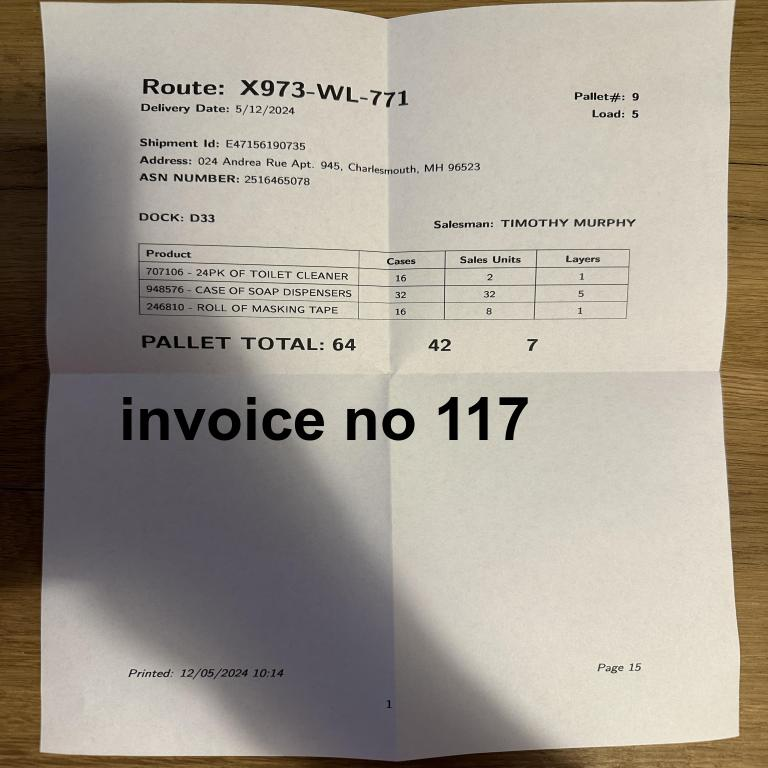

In [22]:
image = Image.open("oie_xliXhfFXmBXl.jpg")
image

In [17]:
# import requests
# url = "path of iamge"
# image = Image.open(requests.get(url, stream=True).raw)

{
    "route": "X973-WL-771",
    "pallet_number": "9",
    "delivery_date": "5/12/2024",
    "load": "5",
    "dock": "D33",
    "shipment_id": "E47156192235",
    "destination": "024 Andrea Roe Apt. 945, Charlesmouth, MH 96523",
    "asn_number": "2516465078",
    "salesman": "TIMOTHY MURPHY",
    "products": [
        {
            "description": "707106 - 24PK OF TOILET CLEANER",
            "cases": "16",
            "sales_units": "2",
            "layers": "1"
        },
        {
            "description": "346876 - CASE OF SOAP DISPENSERS",
            "cases": "32",
            "sales_units": "32",
            "layers": "5"
        },
        {
            "description": "246810 - ROLL OF MASKING TAPE",
            "cases": "16",
            "sales_units": "8",
            "layers": "1"
        }
    ],
    "total_cases": "64",
    "total_units": "42",
    "total_layers": "7",
    "invoice_number": "117",
    "printed_date": "12/05/2024 10:14",
    "page_number": "15"
}


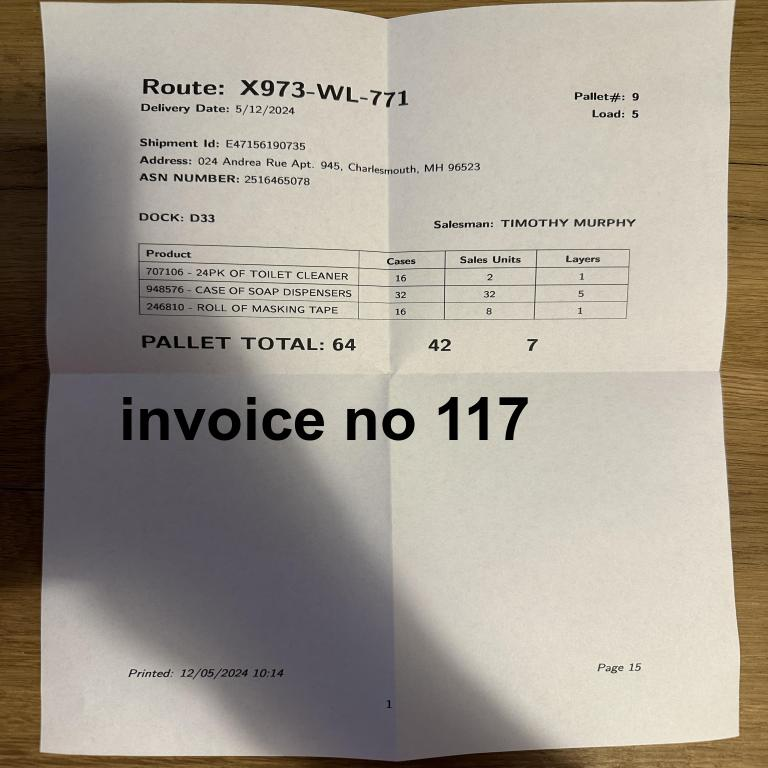

In [23]:


prefix = "<image>extract Document data in JSON format"

inputs = processor(
    text=prefix,
    images=image,
    return_tensors="pt"
).to(TORCH_DTYPE).to(DEVICE)

prefix_length = inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**inputs, max_new_tokens=512, do_sample=False)
    generation = generation[0][prefix_length:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(json.dumps(json.loads(decoded), indent=4))
    # print(decoded)

image